In [72]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
df1 = pd.read_csv('./data/Admission_Predict.csv')
df2 = pd.read_csv('./data/Admission_Predict_Ver1.1.csv')
full_df = df1.append(df2, ignore_index=True)

full_df.columns = ['serial_no', 'gre_score', 'toefl_score', 'uni_rating', 'sop', 'lor', 'cgpa', 'reasearch', 'chance_of_admit']
full_df = full_df.drop(['serial_no'], axis=1)
full_df.head(5)

,gre_score,toefl_score,uni_rating,sop,lor,cgpa,reasearch,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [58]:
full_df.describe()

,gre_score,toefl_score,uni_rating,sop,lor,cgpa,reasearch,chance_of_admit
count,900.000000,900.000000,900.000000,900.000000,900.00000,900.000000,900.000000,900.000000
mean,316.621111,107.288889,3.102222,3.385556,3.47000,8.586433,0.554444,0.722900
std,11.369700,6.073968,1.143048,0.997612,0.91319,0.600822,0.497303,0.141722
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.140000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.570000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.052500,1.000000,0.822500
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.970000


In [59]:
full_df.info()

full_df['reasearch'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gre_score        900 non-null    int64  
 1   toefl_score      900 non-null    int64  
 2   uni_rating       900 non-null    int64  
 3   sop              900 non-null    float64
 4   lor              900 non-null    float64
 5   cgpa             900 non-null    float64
 6   reasearch        900 non-null    int64  
 7   chance_of_admit  900 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 56.4 KB


1    499
0    401
Name: reasearch, dtype: int64

In [60]:
drop_indices = np.random.choice(full_df[full_df['reasearch']==1].index, 98, replace=False)
full_df.drop(drop_indices, inplace=True)
full_df.reset_index(drop=True)

,gre_score,toefl_score,uni_rating,sop,lor,cgpa,reasearch,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
797,332,108,5,4.5,4.0,9.02,1,0.87
798,337,117,5,5.0,5.0,9.87,1,0.96
799,330,120,5,4.5,5.0,9.56,1,0.93
800,312,103,4,4.0,5.0,8.43,0,0.73


In [61]:
print(full_df['reasearch'].value_counts())

1    401
0    401
Name: reasearch, dtype: int64


In [62]:
for col in full_df.columns:
    full_df['new_'+col] = (full_df[col]-full_df[col].min())/(full_df[col].max()-full_df[col].min())

In [63]:
full_df = full_df.drop(full_df.columns.to_series()['gre_score':'chance_of_admit'], axis=1)

full_df.head(5)

,new_gre_score,new_toefl_score,new_uni_rating,new_sop,new_lor,new_cgpa,new_reasearch,new_chance_of_admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063


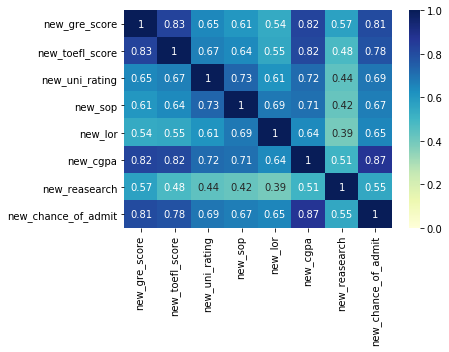

In [64]:
ax = sns.heatmap(full_df.corr(), annot=True,vmin=0, vmax=1 ,cmap='YlGnBu')

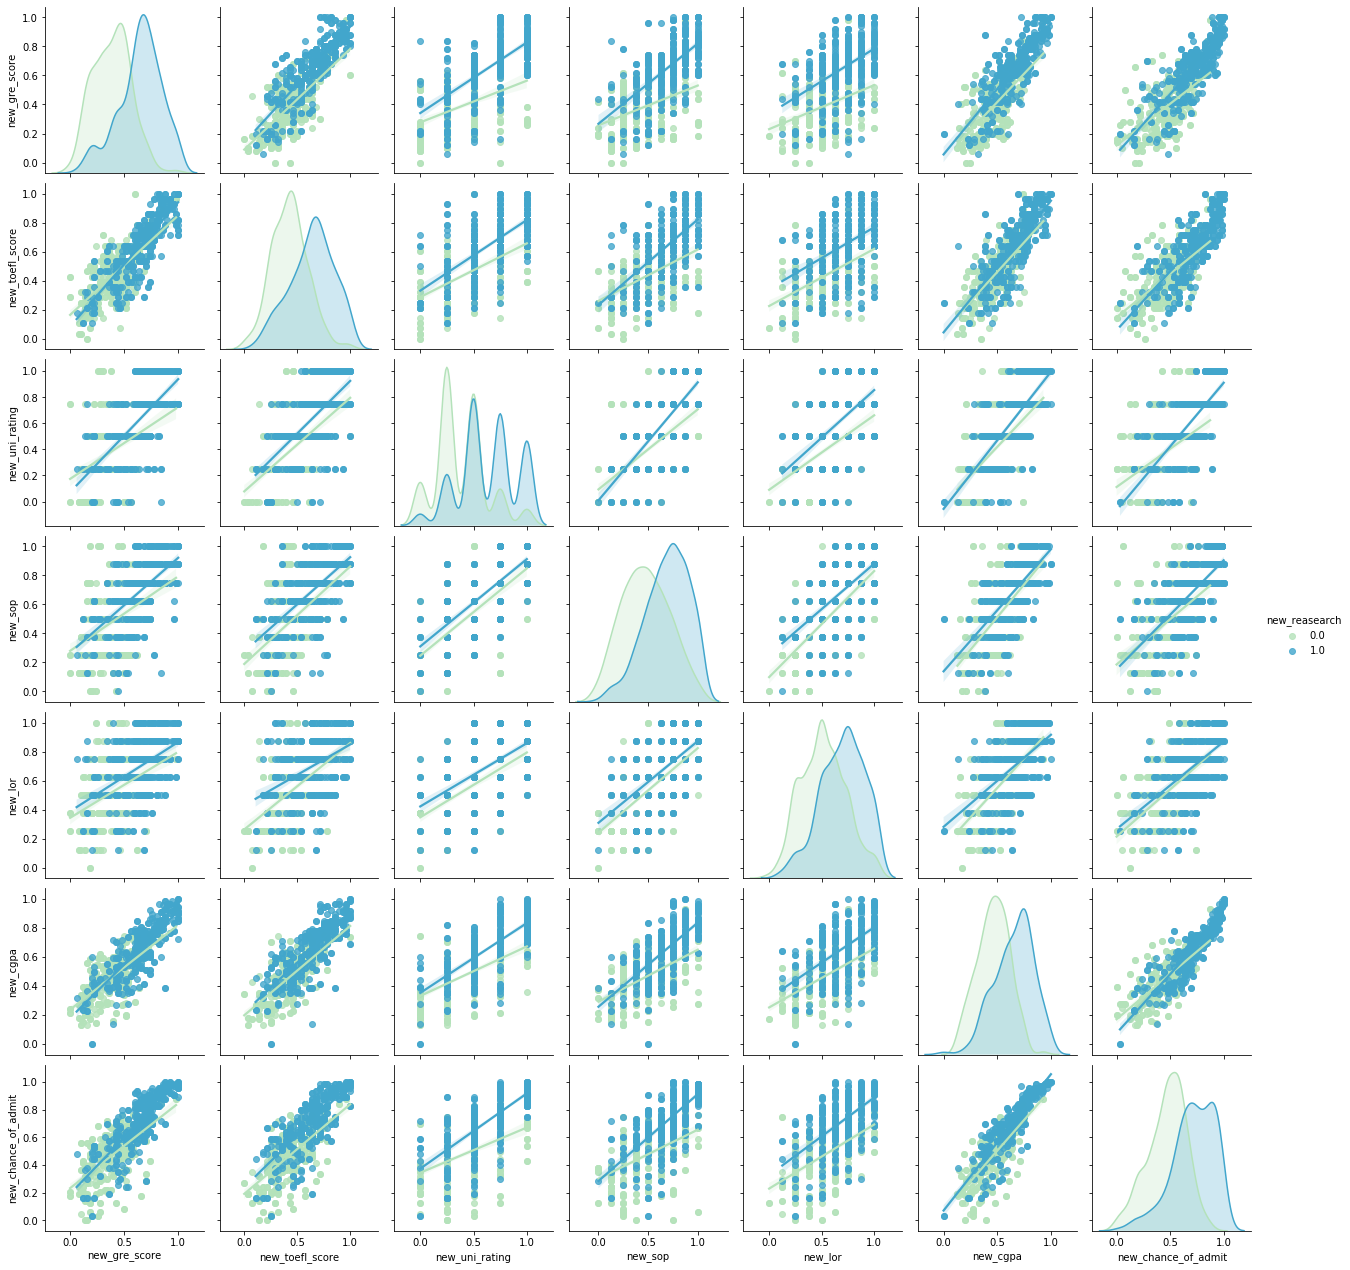

In [65]:
pair = sns.pairplot(full_df, hue="new_reasearch", kind='reg', palette='GnBu')

In [67]:
full_df = pd.concat([full_df,pd.get_dummies(full_df['new_reasearch'], prefix='reasearch')],axis=1)
full_df = full_df.drop('new_reasearch',axis = 1)

In [68]:
full_df.columns

Index(['new_gre_score', 'new_toefl_score', 'new_uni_rating', 'new_sop',
       'new_lor', 'new_cgpa', 'new_chance_of_admit', 'reasearch_0.0',
       'reasearch_1.0'],
      dtype='object')

In [70]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(full_df.loc[:, ['new_gre_score', 'new_toefl_score', 'new_uni_rating', 'new_sop',
       'new_lor', 'new_cgpa', 'new_chance_of_admit', 'reasearch_0.0', 'reasearch_1.0']].values, i) for i in (range(full_df.shape[1]))]
vif["features"] = full_df.columns

In [71]:
vif.head(full_df.shape[1])

,VIF Factor,features
0,4.571546,new_gre_score
1,4.053975,new_toefl_score
2,2.723542,new_uni_rating
3,2.900813,new_sop
4,2.205149,new_lor
5,6.129924,new_cgpa
6,5.195856,new_chance_of_admit
7,5.847697,reasearch_0.0
8,10.420624,reasearch_1.0


In [75]:
X = full_df[['new_gre_score', 'new_toefl_score', 'new_uni_rating', 'new_sop', 'new_lor', 'new_cgpa', 'reasearch_0.0',
             'reasearch_1.0']]
Y = full_df['new_chance_of_admit']

model = sm.OLS(Y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     new_chance_of_admit   R-squared:                       0.808
Model:                             OLS   Adj. R-squared:                  0.806
Method:                  Least Squares   F-statistic:                     475.9
Date:                 Tue, 07 Jul 2020   Prob (F-statistic):          4.29e-279
Time:                         22:34:36   Log-Likelihood:                 717.01
No. Observations:                  802   AIC:                            -1418.
Df Residuals:                      794   BIC:                            -1381.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
new_gre_score       0.1601      0.032      4.932      0.000       0.096       0.224
new_toefl_score     0.1063      0.032      3.285      0.001       0.043       0.170
new_uni_rating      0.0350      0.021      1.704      0.089      -0.005       0.075
new_sop            -0.0062      0.024     -0.262      0.794      -0.053       0.041
new_lor             0.1213      0.023      5.376      0.000       0.077       0.166
new_cgpa            0.6000      0.040     14.994      0.000       0.521       0.679
reasearch_0.0       0.0108      0.012      0.896      0.370      -0.013       0.034
reasearch_1.0       0.0486      0.016      3.050      0.002       0.017       0.080
==============================================================================
Omnibus:                      171.207   Durbin-Watson:                   0.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              387.755
Skew:                          -1.150   Prob(JB):                     6.31e-85
Kurtosis:                       5.513   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
X = full_df[['new_gre_score', 'new_toefl_score', 'new_uni_rating', 'new_lor', 'new_cgpa', 'reasearch_0.0',
             'reasearch_1.0']]
Y = full_df['new_chance_of_admit']

model = sm.OLS(Y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     new_chance_of_admit   R-squared:                       0.808
Model:                             OLS   Adj. R-squared:                  0.806
Method:                  Least Squares   F-statistic:                     555.9
Date:                 Tue, 07 Jul 2020   Prob (F-statistic):          1.81e-280
Time:                         22:48:39   Log-Likelihood:                 716.98
No. Observations:                  802   AIC:                            -1420.
Df Residuals:                      795   BIC:                            -1387.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
new_gre_score       0.1606      0.032      4.959      0.000       0.097       0.224
new_toefl_score     0.1054      0.032      3.277      0.001       0.042       0.169
new_uni_rating      0.0330      0.019      1.729      0.084      -0.004       0.071
new_lor             0.1193      0.021      5.638      0.000       0.078       0.161
new_cgpa            0.5983      0.039     15.170      0.000       0.521       0.676
reasearch_0.0       0.0106      0.012      0.882      0.378      -0.013       0.034
reasearch_1.0       0.0483      0.016      3.041      0.002       0.017       0.080
==============================================================================
Omnibus:                      172.041   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              390.445
Skew:                          -1.154   Prob(JB):                     1.64e-85
Kurtosis:                       5.521   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""